Text Mining (English) Project Code

*   목표: 트위터 데이터를 수집하고 다양한 텍스트 분석 방법으로 분석하고 의미있는 결과를 얻자


*   Crawling
*   전처리
*   Word Cloud
*   감성분석
*   토픽분석









# SNS crawling를 사용하고 데이터 수집


*   snscrape를 사용 (https://github.com/JustAnotherArchivist/snscrape)


In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

In [95]:
#검색하고 싶은 단어
search_word = "bts"

#검색하는 기간
start_day = "2022-01-01"
end_day = "2022-10-15"

search_query = search_word + ' since:' + start_day + ' until:' + end_day 

#지정한 기간에서 검색하고 싶은 단어를 포함한 tweet를 취득
scraped_tweets = sntwitter.TwitterSearchScraper(search_query).get_items()

In [96]:
#처음부터 1000개의 tweets를 취득
sliced_scraped_tweets = itertools.islice(scraped_tweets, 1000)

In [97]:
#pandas DataFrame으로 변환
df = pd.DataFrame(sliced_scraped_tweets)

In [98]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/irina88885/status/15809783...,2022-10-14 17:46:27+00:00,@omermeroz #GoodLuckBTS \n#AllTheBestBTS \n#Ye...,1580978355297746944,irina88885,[],,[],
1,https://twitter.com/JMJKJIKOOK2/status/1580978...,2022-10-14 17:46:27+00:00,@katerine_1108 @BTS Celeste \n\n I'm voting fo...,1580978354244636672,JMJKJIKOOK2,[],,[],
2,https://twitter.com/sowoozoolove/status/158097...,2022-10-14 17:46:26+00:00,@ONLYBTSJIMIN20 @BTS_twt ㅋㅋㅋ탐라보니 다들 잠을 못주무시고 계...,1580978351908741120,sowoozoolove,[],,[],
3,https://twitter.com/AishvaryaMb/status/1580978...,2022-10-14 17:46:26+00:00,I’m voting for [BTS] for [Favourite pop duo or...,1580978351451549696,AishvaryaMb,[],,[],
4,https://twitter.com/Rap_Hoya/status/1580978351...,2022-10-14 17:46:26+00:00,I am vibing to the song #jhope_EqualSign from...,1580978351271215104,Rap_Hoya,[],,[],
...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/aloevantae/status/15809775...,2022-10-14 17:43:09+00:00,ga ga ga ngapain takut kalo run bts ada koreog...,1580977522711625729,aloevantae,[],,[],
996,https://twitter.com/Lutfiyaah/status/158097752...,2022-10-14 17:43:09+00:00,This is wild. I love Army. They've got charact...,1580977522426097664,Lutfiyaah,[https://twitter.com/ksjxthv/status/1580682670...,https://twitter.com/ksjxthv/status/15806826708...,[https://t.co/eWYbRqBxLD],https://t.co/eWYbRqBxLD
997,https://twitter.com/minmaria98/status/15809775...,2022-10-14 17:43:08+00:00,Me gusta BTS VOTING lmaoo https://t.co/a5cTs3KQuy,1580977521583329280,minmaria98,[],,[],
998,https://twitter.com/NoeorNaomi/status/15809775...,2022-10-14 17:43:08+00:00,@MinVero3 @BTS_twt Esto es una puta broma????,1580977521365241856,NoeorNaomi,[],,[],


# content에 keyword가 없고 username에 keyword가 있는 경우도 있어서 그런 경우를 제거하자

In [99]:
df = df[df['content'].str.contains('bts|BTS')]
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/irina88885/status/15809783...,2022-10-14 17:46:27+00:00,@omermeroz #GoodLuckBTS \n#AllTheBestBTS \n#Ye...,1580978355297746944,irina88885,[],,[],
1,https://twitter.com/JMJKJIKOOK2/status/1580978...,2022-10-14 17:46:27+00:00,@katerine_1108 @BTS Celeste \n\n I'm voting fo...,1580978354244636672,JMJKJIKOOK2,[],,[],
2,https://twitter.com/sowoozoolove/status/158097...,2022-10-14 17:46:26+00:00,@ONLYBTSJIMIN20 @BTS_twt ㅋㅋㅋ탐라보니 다들 잠을 못주무시고 계...,1580978351908741120,sowoozoolove,[],,[],
3,https://twitter.com/AishvaryaMb/status/1580978...,2022-10-14 17:46:26+00:00,I’m voting for [BTS] for [Favourite pop duo or...,1580978351451549696,AishvaryaMb,[],,[],
4,https://twitter.com/Rap_Hoya/status/1580978351...,2022-10-14 17:46:26+00:00,I am vibing to the song #jhope_EqualSign from...,1580978351271215104,Rap_Hoya,[],,[],
...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/aloevantae/status/15809775...,2022-10-14 17:43:09+00:00,ga ga ga ngapain takut kalo run bts ada koreog...,1580977522711625729,aloevantae,[],,[],
996,https://twitter.com/Lutfiyaah/status/158097752...,2022-10-14 17:43:09+00:00,This is wild. I love Army. They've got charact...,1580977522426097664,Lutfiyaah,[https://twitter.com/ksjxthv/status/1580682670...,https://twitter.com/ksjxthv/status/15806826708...,[https://t.co/eWYbRqBxLD],https://t.co/eWYbRqBxLD
997,https://twitter.com/minmaria98/status/15809775...,2022-10-14 17:43:08+00:00,Me gusta BTS VOTING lmaoo https://t.co/a5cTs3KQuy,1580977521583329280,minmaria98,[],,[],
998,https://twitter.com/NoeorNaomi/status/15809775...,2022-10-14 17:43:08+00:00,@MinVero3 @BTS_twt Esto es una puta broma????,1580977521365241856,NoeorNaomi,[],,[],


# 텍스트 데이터를 전처리

In [100]:
# df의 열 정보를 확인
df.columns

Index(['url', 'date', 'content', 'id', 'username', 'outlinks', 'outlinksss',
       'tcooutlinks', 'tcooutlinksss'],
      dtype='object')

In [101]:
#data frame에서 텍스트 데이터 열만 추출
df.content

0      @omermeroz #GoodLuckBTS \n#AllTheBestBTS \n#Ye...
1      @katerine_1108 @BTS Celeste \n\n I'm voting fo...
2      @ONLYBTSJIMIN20 @BTS_twt ㅋㅋㅋ탐라보니 다들 잠을 못주무시고 계...
3      I’m voting for [BTS] for [Favourite pop duo or...
4      I am vibing to the song #jhope_EqualSign  from...
                             ...                        
995    ga ga ga ngapain takut kalo run bts ada koreog...
996    This is wild. I love Army. They've got charact...
997    Me gusta BTS VOTING lmaoo https://t.co/a5cTs3KQuy
998        @MinVero3 @BTS_twt Esto es una puta broma????
999    O BTS TIRANDO A ROUPA DO TAEHYING ELES SAO GAY...
Name: content, Length: 837, dtype: object

In [102]:
# 각 트위트의 특징을 확인
for tweet in df.content:
  print(tweet)

@omermeroz #GoodLuckBTS 
#AllTheBestBTS 
#YetToComeBusan 
#YetToComeTHECITYinBUSAN 
I’m voting for BTS for Favorite Pop Duo or Group at the #AMAs
@katerine_1108 @BTS Celeste 

 I'm voting for BTS (@BTS) for Favorite Pop Duo or Group at the #AMAs
@ONLYBTSJIMIN20 @BTS_twt ㅋㅋㅋ탐라보니 다들 잠을 못주무시고 계셔욬ㅋㅋㅋ
I’m voting for [BTS] for [Favourite pop duo or group] at the #AMAs 💜💜💜💜
I am vibing to the song #jhope_EqualSign  from the critically-acclaimed album #JackInTheBox by #jhope (@BTS_twt) https://t.co/c7jzV0FnJk
@JE0NSJIN_ @BTS_twt THE BESTEST BOYYYY

I'm voting for BTS (@BTS_twt) for Favorite Pop Duo or Group at the #AMAs
@rkivedevil I'm voting for @BTS_twt for Favorite Pop Duo or Group #AMAs    vinte
@fpvote Done for #JIN ✅

Keep listening to Yours by Jin #Yours_Jin and Super Tuna #SuperTuna_Jin by Kim Seokjin #BTSJIN of @BTS_twt https://t.co/3a7Uj9Cf04
@rkivedevil I'm voting for @BTS_twt for Favorite Pop Duo or Group #AMAs     f
Eu escuto a música do bts como fosse primeira vez, todos os dias 

# 불요어(stop words)랑 불필요한 기호 등을 제거

In [103]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [105]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

불요어 추가

In [106]:
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(["rt","bts","BTS"]) ###여기서  필요한 stopwords추가
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [107]:
import re
# 트위터분석을 위한 기본적인 텍스트 cleaning 함수
def CleanText(readData, Num=True, Eng=True):
    # Remove Retweets
    text = re.sub('RT @[\w_]+: ', '', readData)
    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)
    # Remove or Replace URL
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ',
                  text)  # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ',
                  text)  # http로 시작되지 않는 url
    # Remove only hashtag simbol "#" because hashtag contains huge information
    text = re.sub(r'#', ' ', text)
    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)
    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    # Remove 출처 by yamada
    text = re.sub(r"(출처.*)", ' ', text)
    # Remove newline
    text = text.replace('\n', ' ')

    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+', ' ', text)

    if Eng is True:
        # Remove English
        text = re.sub('[a-zA-Z]', ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())

    return text


tweet를 하나하나 불러오고 stopwords를 제거

In [108]:
cleaned_tweets_all = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  print("---------------------")
  print("전처리 전:", word_tokenize(tweet))
  print("전처리 후:", cleaned_tweet)
  print("---------------------")
  cleaned_tweets_all.append(cleaned_tweet)

---------------------
전처리 전: ['@', 'omermeroz', '#', 'GoodLuckBTS', '#', 'AllTheBestBTS', '#', 'YetToComeBusan', '#', 'YetToComeTHECITYinBUSAN', 'I', '’', 'm', 'voting', 'for', 'BTS', 'for', 'Favorite', 'Pop', 'Duo', 'or', 'Group', 'at', 'the', '#', 'AMAs']
전처리 후: ['GoodLuckBTS', 'AllTheBestBTS', 'YetToComeBusan', 'YetToComeTHECITYinBUSAN', 'voting', 'Favorite', 'Pop', 'Duo', 'Group', 'AMAs']
---------------------
---------------------
전처리 전: ['@', 'katerine_1108', '@', 'BTS', 'Celeste', 'I', "'m", 'voting', 'for', 'BTS', '(', '@', 'BTS', ')', 'for', 'Favorite', 'Pop', 'Duo', 'or', 'Group', 'at', 'the', '#', 'AMAs']
전처리 후: ['Celeste', 'voting', 'Favorite', 'Pop', 'Duo', 'Group', 'AMAs']
---------------------
---------------------
전처리 전: ['@', 'ONLYBTSJIMIN20', '@', 'BTS_twt', 'ㅋㅋㅋ탐라보니', '다들', '잠을', '못주무시고', '계셔욬ㅋㅋㅋ']
전처리 후: ['ㅋㅋㅋ탐라보니', '다들', '잠을', '못주무시고', '계셔욬ㅋㅋㅋ']
---------------------
---------------------
전처리 전: ['I', '’', 'm', 'voting', 'for', '[', 'BTS', ']', 'for', '[', 'Favouri

In [109]:
len(cleaned_tweets_all)

837

# (Option) 한국어로 텍스트 전처리 하고 싶을 때...


*   konlpy (https://konlpy.org/ko/latest/index.html)
*   (추천)customized_konlpy (https://github.com/lovit/customized_konlpy)



In [60]:
!pip install customized_konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 881 kB 4.2 MB/s 
     |████████████████████████████████| 453 kB 60.3 MB/s 
     |████████████████████████████████| 19.4 MB 92.3 MB/s 


In [61]:
from ckonlpy.tag import Twitter

In [62]:
twitter = Twitter()
twitter.pos("안녕하세요. 저는 인공지능 입니다.")

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('안녕', 'Noun'),
 ('하세요', 'Verb'),
 ('.', 'Punctuation'),
 ('저', 'Noun'),
 ('는', 'Josa'),
 ('인공', 'Noun'),
 ('지능', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

# 새로운 단어를 형태소 분석기가 참조하는 사전에 추가하는 방법

In [63]:
#"인공지능"을 한 단어로 인식 시키기 위해 사전에 추가 해서 처리
twitter.add_dictionary(['인공지능'], 'Noun')

In [64]:
#사전에 "인공지능"이 추가된 효과가 반영
twitter.pos("안녕하세요, 저는 인공지능 입니다.")

[('안녕', 'Noun'),
 ('하세요', 'Verb'),
 (',', 'Punctuation'),
 ('저', 'Noun'),
 ('는', 'Josa'),
 ('인공지능', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

불요어(stopwords) 제거

In [65]:
from ckonlpy.tag import Postprocessor

In [66]:
stopwords = {"저", "는"}
postprocessor = Postprocessor(twitter, stopwords=stopwords)
postprocessor.pos("안녕하세요, 저는 인공지능 입니다.")

[('안녕', 'Noun'),
 ('하세요', 'Verb'),
 (',', 'Punctuation'),
 ('인공지능', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

명사("Noun")만 보고 싶어

In [67]:
passtags = {'Noun'}
postprocessor = Postprocessor(twitter, stopwords=stopwords, passtags=passtags)
postprocessor.pos("안녕하세요, 저는 인공지능 입니다.")

[('안녕', 'Noun'), ('인공지능', 'Noun')]

나머지 기능은 홈페이지 (https://github.com/lovit/customized_konlpy) 참조

# Word Cloud 만들기

In [110]:
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
from wordcloud import WordCloud
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# word cloud를 만드는 함수를 생성

In [112]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(
                          width=800, height=400,
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} #제거하고 싶은 단어를 여기에 입력
                          ).generate(text)
    
    fig = plt.figure(1, figsize=(8, 4))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")

Word Cloud를 위해 단어의 리스트 모든 단어를 한 문자열으로 연결

In [113]:
all_words = []
for cleaned_tweet in cleaned_tweets_all:
  for word in cleaned_tweet:
    all_words.append(word)

all_words_str = ' '.join(all_words)

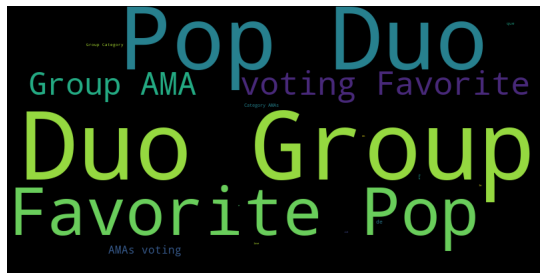

In [114]:
generate_wordcloud(all_words_str)

In [23]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 12 not upgraded.
Need to get 37.0 MB of archives.
After this operation, 145 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-eco all 1.000-6 [14

In [75]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
def generate_wordcloud_korean(text): 
    wordcloud = WordCloud(
                          font_path = FONT_PATH,
                          width=800, height=400,
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} #제거하고 싶은 단어를 여기에 입력
                          ).generate(text)
    
    fig = plt.figure(1, figsize=(8, 4))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")

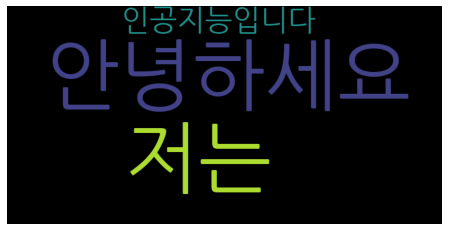

In [76]:
generate_wordcloud_korean("안녕하세요. 저는 인공지능입니다.")

# 감성분석

In [24]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import nltk
nltk.download([ "stopwords",  "vader_lexicon"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(["rt|bts|BTS"]) ###여기서  필요한 stopwords추가
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

sentiment analysis check

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("bad")

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5423}

# (option) 한국어로 간단하게 감성분석 하는 방법:google Translate

In [82]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=a2209aeb8f1b074cfcc48dc6b9a13a749a6f2dc1b93238ab5279d946276cc9a6
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


In [83]:
from googletrans import Translator
translator = Translator()
original_text = '안녕하세요. 역시 파이썬은 너무 좋네요'
translations = translator.translate(original_text, 'en')
print(original_text)
print(translations.text)
translated_text = translations.text

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(translated_text)

안녕하세요. 역시 파이썬은 너무 좋네요
hello.After all, Python is so good


{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.5777}

# 데이터셋 전체에 대해서 Sentiment Analysis 실행

In [115]:
sentiment_result = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  cleaned_tweet_str = ' '.join(cleaned_tweet)
  print("전처리 전: " + tweet)
  print("전처리 후: " + cleaned_tweet_str)
  print(sia.polarity_scores(cleaned_tweet_str))

  #positive or negative 분류 compound score가 0 보다 크면 positive, 이하는 negative로 함
  compound_point = sia.polarity_scores(cleaned_tweet_str)['compound']
  if compound_point > 0:
    sentiment_result.append('Positive')

  else:
    sentiment_result.append('Negative')

전처리 전: @omermeroz #GoodLuckBTS 
#AllTheBestBTS 
#YetToComeBusan 
#YetToComeTHECITYinBUSAN 
I’m voting for BTS for Favorite Pop Duo or Group at the #AMAs
전처리 후: GoodLuckBTS AllTheBestBTS YetToComeBusan YetToComeTHECITYinBUSAN voting Favorite Pop Duo Group AMAs
{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.4588}
전처리 전: @katerine_1108 @BTS Celeste 

 I'm voting for BTS (@BTS) for Favorite Pop Duo or Group at the #AMAs
전처리 후: Celeste voting Favorite Pop Duo Group AMAs
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588}
전처리 전: @ONLYBTSJIMIN20 @BTS_twt ㅋㅋㅋ탐라보니 다들 잠을 못주무시고 계셔욬ㅋㅋㅋ
전처리 후: ㅋㅋㅋ탐라보니 다들 잠을 못주무시고 계셔욬ㅋㅋㅋ
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: I’m voting for [BTS] for [Favourite pop duo or group] at the #AMAs 💜💜💜💜
전처리 후: voting Favourite pop duo group AMAs
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: I am vibing to the song #jhope_EqualSign  from the critically-acclaimed album #JackInTheBox by #jhope (@BTS_twt) https://t.co/c7jzV0F

감성분석의 시각화

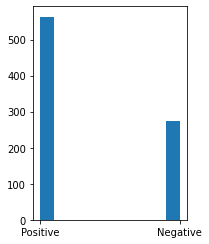

In [116]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [3.0, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.hist(sentiment_result)

# Display the plot
plt.show()

# Topic Analysis

In [118]:
!pip install gensim
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [122]:
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaSeqModel, LdaModel

In [123]:
cleaned_tweets_all = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  # print("---------------------")
  # print("전처리 전:", word_tokenize(tweet))
  # print("전처리 후:", cleaned_tweet)
  # print("---------------------")
  cleaned_tweets_all.append(cleaned_tweet)

In [125]:
id2word = Dictionary(cleaned_tweets_all)
corpus = [id2word.doc2bow(text) for text in cleaned_tweets_all]

In [126]:
topic_number = 10 #10개의 topic group로 나눔

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=topic_number,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)

In [127]:
for topic_topwords in lda_model.print_topics():
  print(topic_topwords)

(0, '0.034*"YetToComeinBUSAN" + 0.028*"love" + 0.024*"show" + 0.018*"YetToComeTHECITYinBUSAN" + 0.015*"loves" + 0.011*"na" + 0.011*"pra" + 0.011*"e" + 0.010*"songs" + 0.009*"YetToCome"')
(1, '0.022*"concert" + 0.018*"got" + 0.018*"JIMIN" + 0.014*"run" + 0.013*"day" + 0.013*"WithYou" + 0.013*"Sungwoon" + 0.012*"BTSJIMIN" + 0.011*"Min" + 0.011*"amor"')
(2, '0.016*"favorite" + 0.014*"Best" + 0.011*"Bangtan" + 0.010*"gusta" + 0.010*"W" + 0.010*"TIRANDO" + 0.010*"common" + 0.010*"VOTING" + 0.010*"Lonestar" + 0.010*"ROUPA"')
(3, '0.045*"n" + 0.026*"por" + 0.019*"AllTheBestBTS" + 0.018*"GoodLuckBTS" + 0.016*"FAVORITE" + 0.015*"GROUP" + 0.015*"llorar" + 0.013*"DUO" + 0.013*"POP" + 0.009*"fin"')
(4, '0.144*"AMAs" + 0.136*"Favorite" + 0.132*"voting" + 0.132*"Group" + 0.131*"Duo" + 0.124*"Pop" + 0.019*"Category" + 0.008*"vote" + 0.006*"El" + 0.003*"voted"')
(5, '0.034*"album" + 0.033*"Proof" + 0.030*"YetToCome" + 0.025*"song" + 0.024*"Jin" + 0.018*"anthology" + 0.016*"listening" + 0.015*"Let" + 0

# 향후 방향


*   본인이 조사 하고 싶은 key word를 정해서 분석
*   년도별, 월별의 변화를 관찰

*   토픽별 감성 비교
*   여러개의 key word를 사용해서 결과 비교 (Ex, galaxy vs iphone) 





# 참고자료


*   https://www.nltk.org/
*   https://radimrehurek.com/gensim/

*   https://huggingface.co/ (for Deep Learning Models in NLP)
*   https://en.wikipedia.org/wiki/Word_embedding (Word Embedding 는 현재 NLP에서의 핵심 기술)



